In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
x = np.linspace(-0.5, 1.5, 100) * 1j + 2.0
y = np.full_like(x, fill_value=1+1j).imag

In [16]:
s = np.abs(np.diff(np.sign(x.imag))).astype(bool)
crossings = x[:-1][s] + np.diff(x)[s]/(np.abs(y[1:][s]/y[:-1][s])+1)

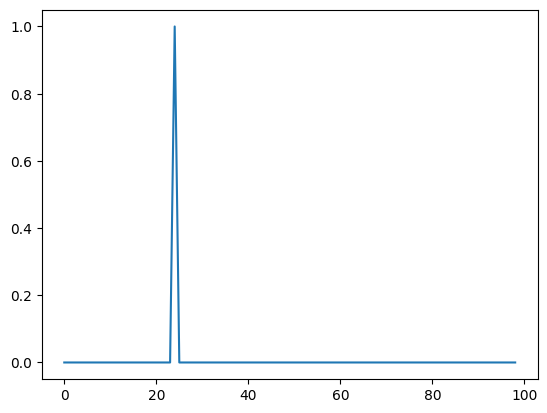

In [12]:
plt.plot(s2)

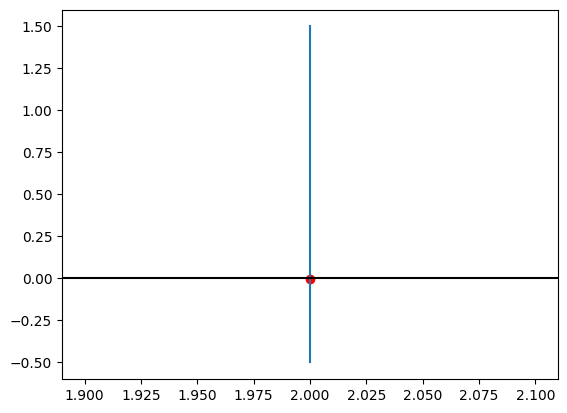

In [18]:
plt.plot(x.real, x.imag)
plt.axhline(0, color="black")
plt.scatter(crossings.real, crossings.imag, color="red")